# Plotting

Plotting different average time series

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from spark.utils import get_channel_names
import spark.params as params

In [35]:
raw_data_prep_dir = '../raw_data/pads-parkinsons-disease-smartwatch-dataset-1.0.0/preprocessed/'

In [36]:
file_list = pd.read_csv(raw_data_prep_dir  + "file_list.csv")
file_list

,resource_type,id,study_id,condition,disease_comment,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,appearance_in_first_grade_kinship,effect_of_alcohol_on_tremor,label
0,patient,1,PADS,Healthy,-,56,56,173,78,male,right,True,True,Unknown,0
1,patient,2,PADS,Other Movement Disorders,Left-Sided resting tremor and hypokinesia with...,69,81,193,104,male,right,False,NaN,No effect,2
2,patient,3,PADS,Healthy,-,45,45,170,78,female,right,False,NaN,Unknown,0
3,patient,4,PADS,Parkinson's,IPS akinetic-rigid type,63,67,161,90,female,right,False,NaN,No effect,1
4,patient,5,PADS,Parkinson's,IPS tremordominant type,65,75,172,86,male,left,False,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,patient,465,PADS,Parkinson's,IPS mixed type,62,65,175,80,male,right,True,False,No effect,1
465,patient,466,PADS,Healthy,-,84,84,172,74,female,right,True,True,No effect,0
466,patient,467,PADS,Parkinson's,"Essential Tremor, starting IPS tremordominant ...",55,57,190,100,male,right,False,NaN,Improvement,1
467,patient,468,PADS,Parkinson's,IPS mixed type,73,76,198,118,male,right,False,NaN,No effect,1


In [37]:
time_data = []
y = []
X_to_split = []
for idx, subject_idx in enumerate(file_list['id']):
    file_name = raw_data_prep_dir + f'movement/{subject_idx:03d}_ml.bin'
    time_idx_data = np.fromfile(file_name, dtype=np.float32).reshape((-1, 976))
    time_data.append(time_idx_data)
    y_idx = file_list[file_list['id']==subject_idx].label.values
    X_id = idx
    y.append(y_idx)
    X_to_split.append(X_id)

X_to_split = np.array(X_to_split)
y = np.array(y).flatten()
time_data = np.array(time_data)
print(time_data.shape)
time_data.shape[0]
range(time_data.shape[0])

(469, 132, 976)


range(0, 469)

In [38]:
channels = get_channel_names()
channels

['Relaxed1_Acceleration_LeftWrist_X',
 'Relaxed1_Acceleration_LeftWrist_Y',
 'Relaxed1_Acceleration_LeftWrist_Z',
 'Relaxed1_Rotation_LeftWrist_X',
 'Relaxed1_Rotation_LeftWrist_Y',
 'Relaxed1_Rotation_LeftWrist_Z',
 'Relaxed1_Acceleration_RightWrist_X',
 'Relaxed1_Acceleration_RightWrist_Y',
 'Relaxed1_Acceleration_RightWrist_Z',
 'Relaxed1_Rotation_RightWrist_X',
 'Relaxed1_Rotation_RightWrist_Y',
 'Relaxed1_Rotation_RightWrist_Z',
 'Relaxed2_Acceleration_LeftWrist_X',
 'Relaxed2_Acceleration_LeftWrist_Y',
 'Relaxed2_Acceleration_LeftWrist_Z',
 'Relaxed2_Rotation_LeftWrist_X',
 'Relaxed2_Rotation_LeftWrist_Y',
 'Relaxed2_Rotation_LeftWrist_Z',
 'Relaxed2_Acceleration_RightWrist_X',
 'Relaxed2_Acceleration_RightWrist_Y',
 'Relaxed2_Acceleration_RightWrist_Z',
 'Relaxed2_Rotation_RightWrist_X',
 'Relaxed2_Rotation_RightWrist_Y',
 'Relaxed2_Rotation_RightWrist_Z',
 'RelaxedTask1_Acceleration_LeftWrist_X',
 'RelaxedTask1_Acceleration_LeftWrist_Y',
 'RelaxedTask1_Acceleration_LeftWrist_Z'

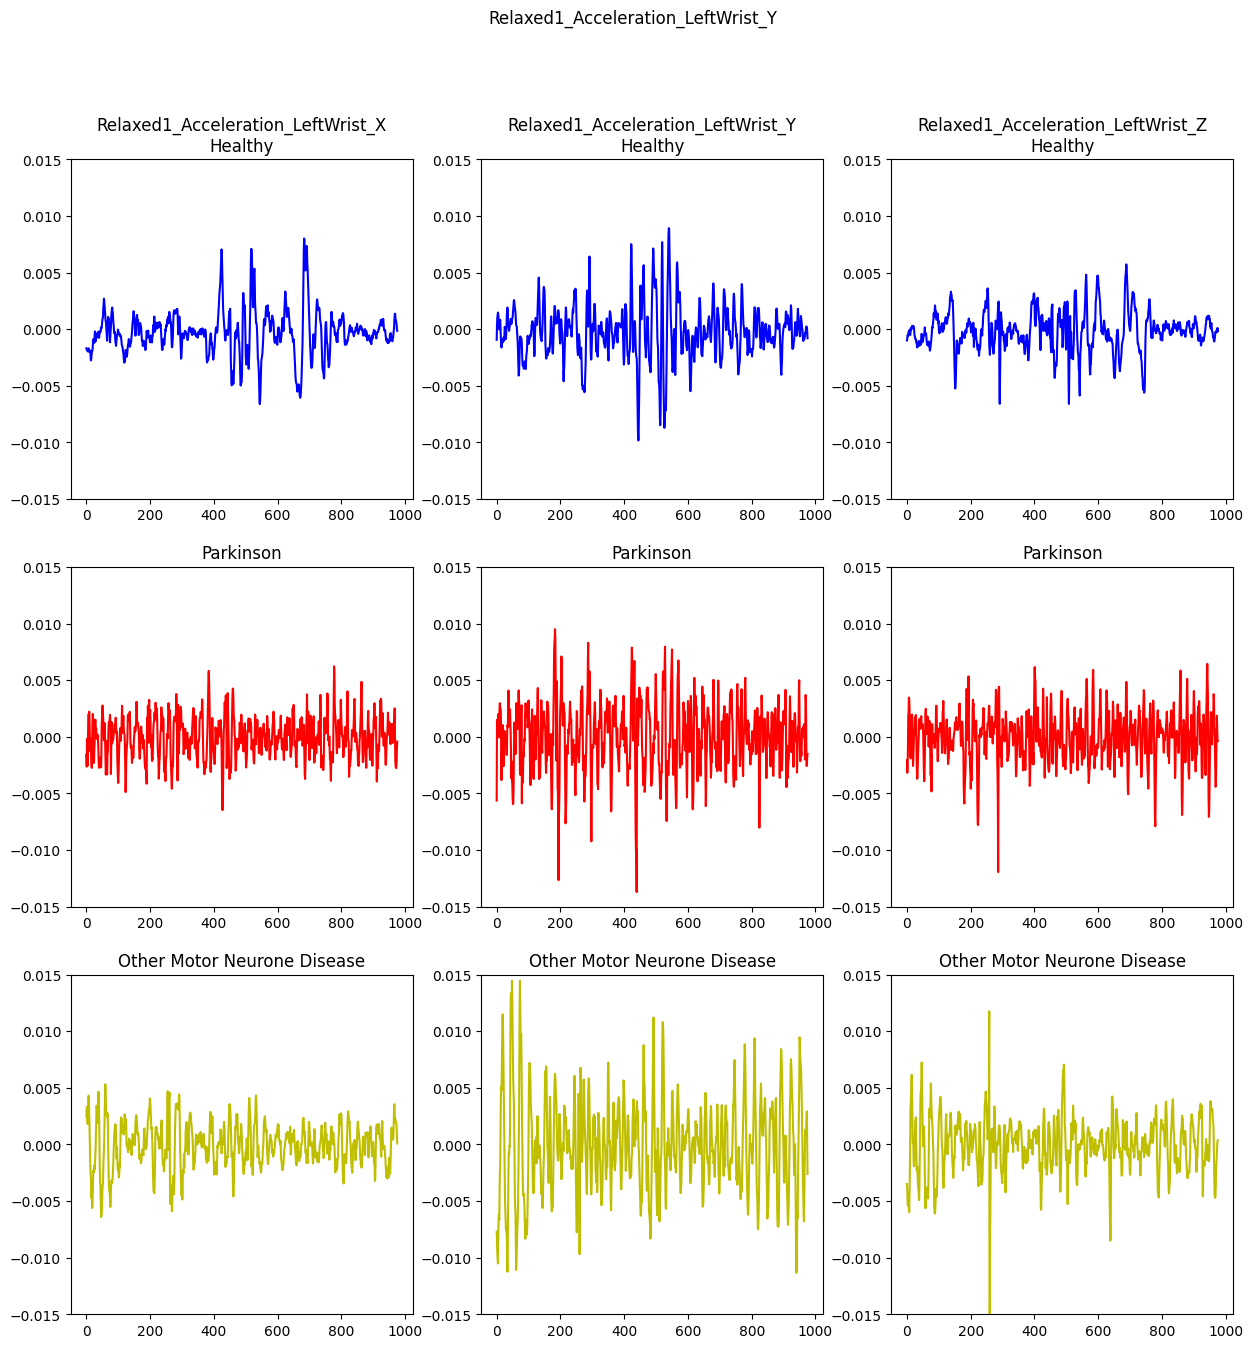

In [ ]:
col = ['b','r','y']
fig, ax = plt.subplots(3,3, figsize = (15,15))
chan_pick = 0
for cond in range(len(params.CONDITION_DICT)):
    ax[cond,0].plot(time_data[y==cond,chan_pick,:].mean(axis = 0), col[cond])
    ax[cond,0].set_ylim(-0.015, 0.015)
    ax[cond,0].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,0].set_title(f'{channels[chan_pick]}\n{params.CONDITION_DICT[cond]}')

for cond in range(len(params.CONDITION_DICT)):
    ax[cond,1].plot(time_data[y==cond,chan_pick+1,:].mean(axis = 0), col[cond])
    ax[cond,1].set_ylim(-0.015, 0.015)
    ax[cond,1].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,1].set_title(f'{channels[chan_pick+1]}\n{params.CONDITION_DICT[cond]}')
    plt.suptitle(channels[chan_pick+1])

for cond in range(len(params.CONDITION_DICT)):
    ax[cond,2].plot(time_data[y==cond,chan_pick+2,:].mean(axis = 0), col[cond])
    ax[cond,2].set_ylim(-0.015, 0.015)
    ax[cond,2].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,2].set_title(f'{channels[chan_pick+2]}\n{params.CONDITION_DICT[cond]}')

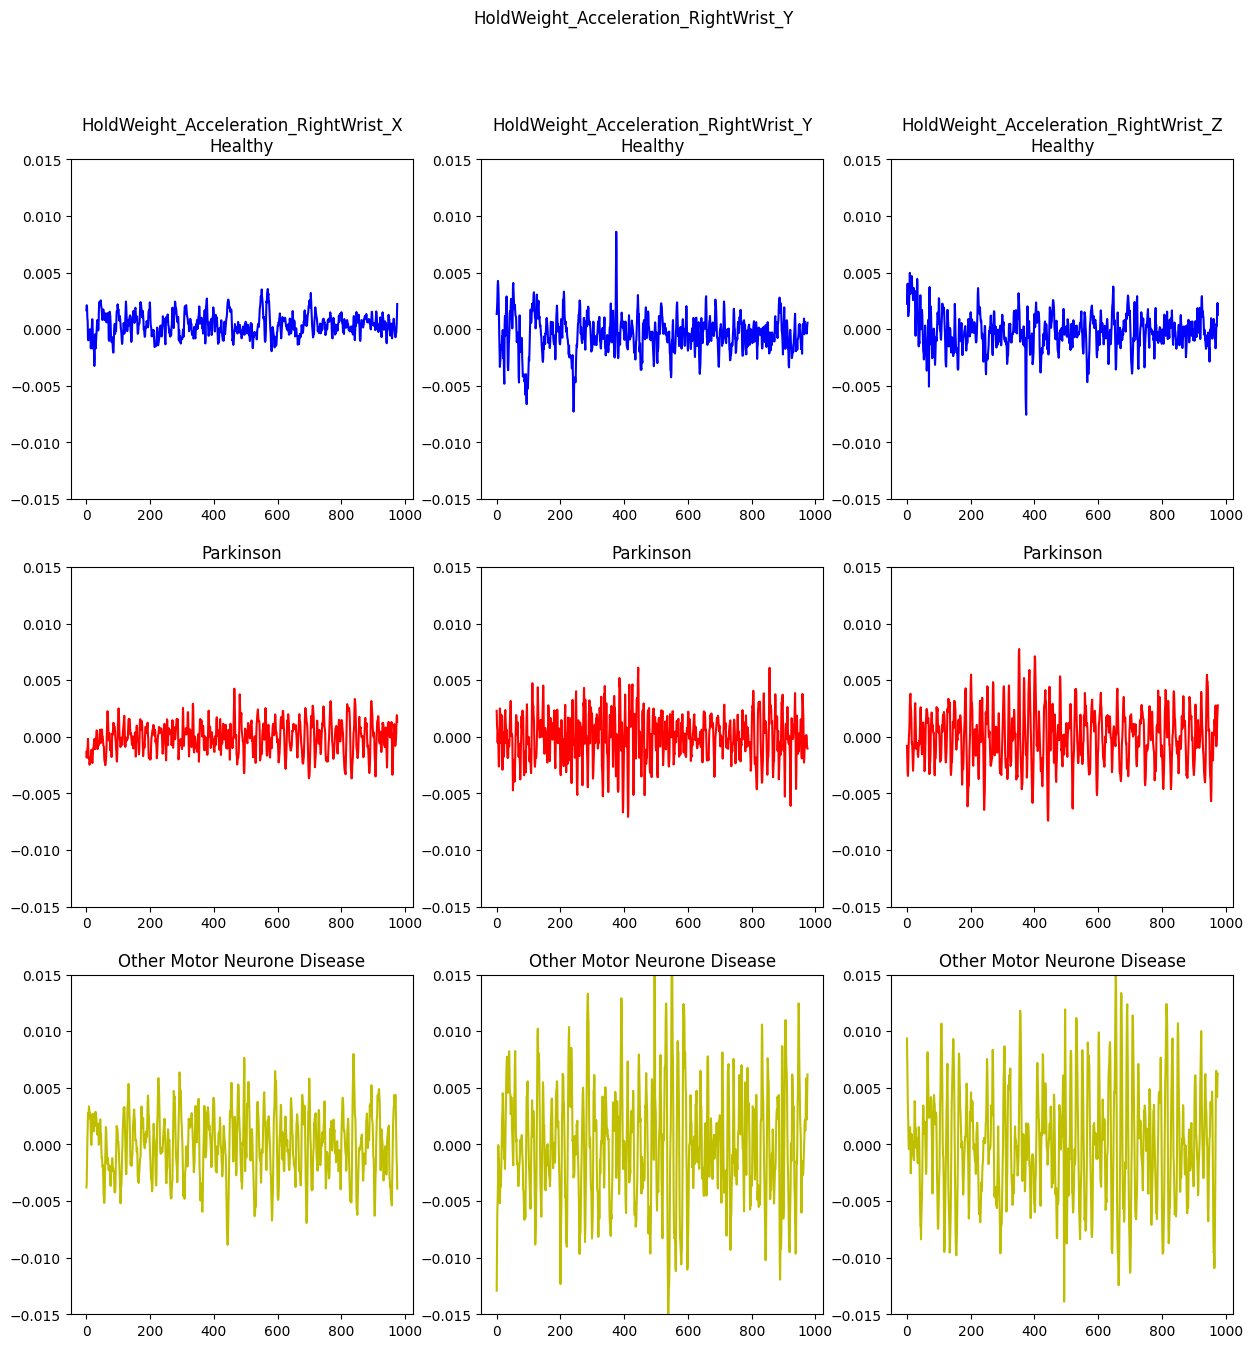

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (15,15))
chan_pick = 66
for cond in range(len(params.CONDITION_DICT)):
    ax[cond,0].plot(time_data[y==cond,chan_pick,:].mean(axis = 0), col[cond])
    ax[cond,0].set_ylim(-0.015, 0.015)
    ax[cond,0].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,0].set_title(f'{channels[chan_pick]}\n{params.CONDITION_DICT[cond]}')

for cond in range(len(params.CONDITION_DICT)):
    ax[cond,1].plot(time_data[y==cond,chan_pick+1,:].mean(axis = 0), col[cond])
    ax[cond,1].set_ylim(-0.015, 0.015)
    ax[cond,1].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,1].set_title(f'{channels[chan_pick+1]}\n{params.CONDITION_DICT[cond]}')
    plt.suptitle(channels[chan_pick+1])

for cond in range(len(params.CONDITION_DICT)):
    ax[cond,2].plot(time_data[y==cond,chan_pick+2,:].mean(axis = 0), col[cond])
    ax[cond,2].set_ylim(-0.015, 0.015)
    ax[cond,2].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,2].set_title(f'{channels[chan_pick+2]}\n{params.CONDITION_DICT[cond]}')


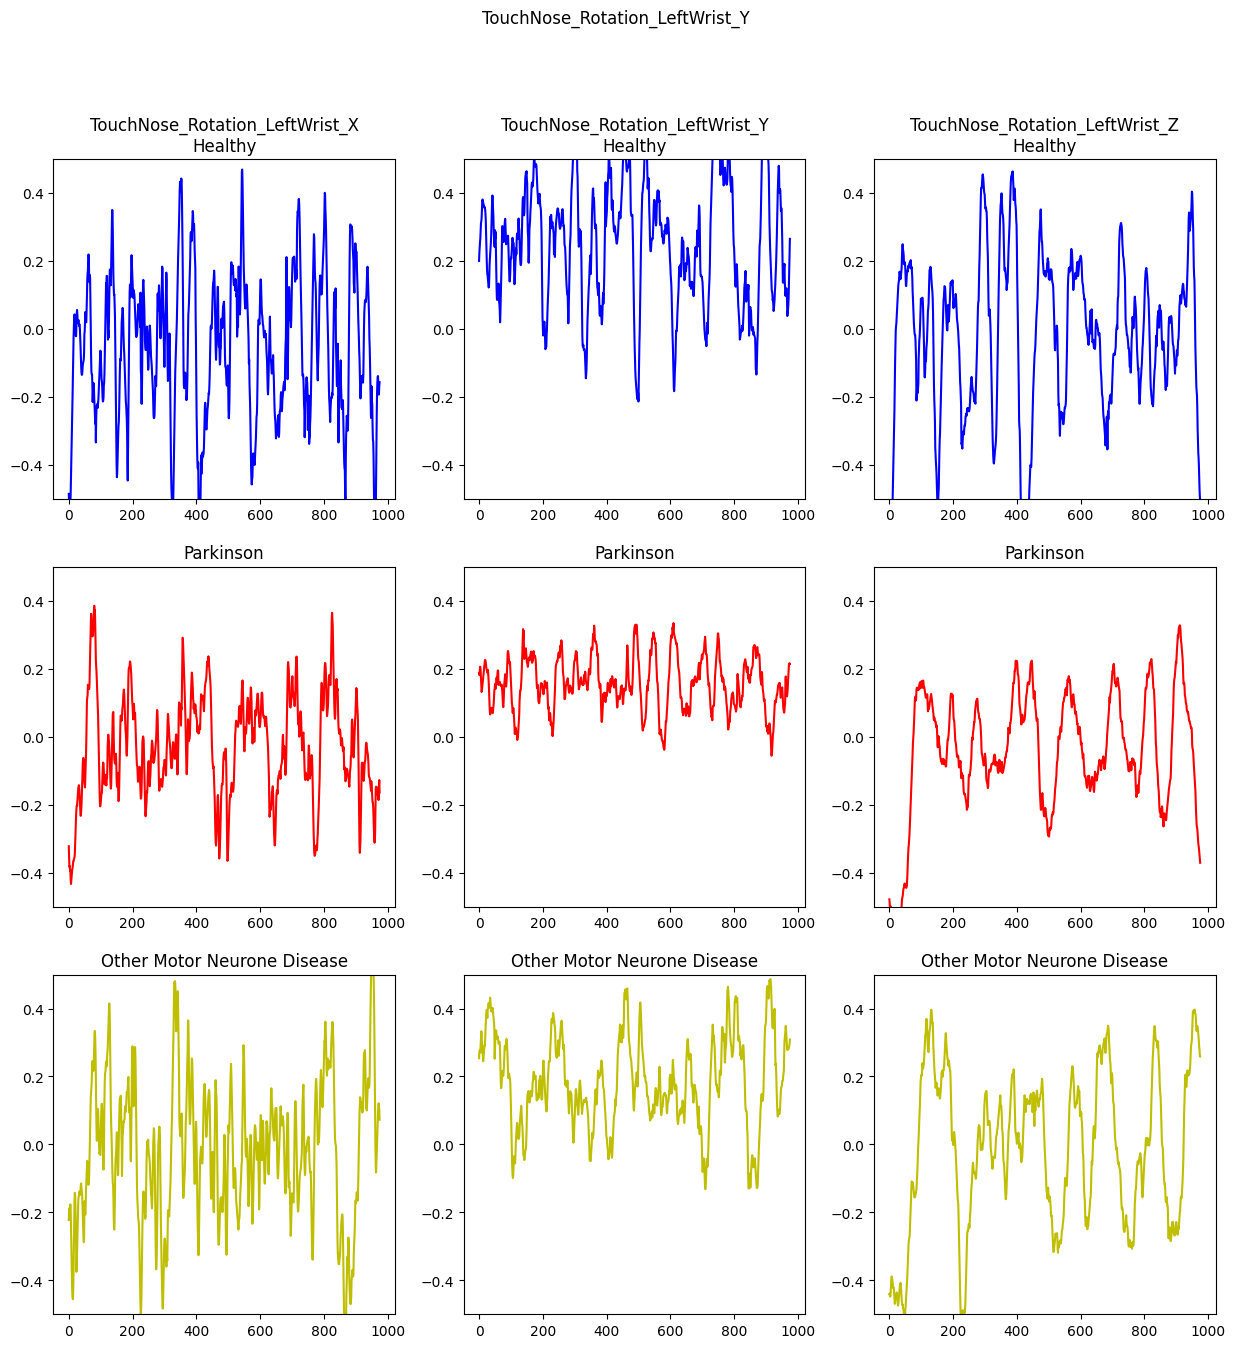

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (15,15))
chan_pick = 99
for cond in range(len(params.CONDITION_DICT)):
    ax[cond,0].plot(time_data[y==cond,chan_pick,:].mean(axis = 0), col[cond])
    ax[cond,0].set_ylim(-0.5, 0.5)
    ax[cond,0].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,0].set_title(f'{channels[chan_pick]}\n{params.CONDITION_DICT[cond]}')

for cond in range(len(params.CONDITION_DICT)):
    ax[cond,1].plot(time_data[y==cond,chan_pick+1,:].mean(axis = 0), col[cond])
    ax[cond,1].set_ylim(-0.5, 0.5)
    ax[cond,1].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,1].set_title(f'{channels[chan_pick+1]}\n{params.CONDITION_DICT[cond]}')
    plt.suptitle(channels[chan_pick+1])

for cond in range(len(params.CONDITION_DICT)):
    ax[cond,2].plot(time_data[y==cond,chan_pick+2,:].mean(axis = 0), col[cond])
    ax[cond,2].set_ylim(-0.5, 0.5)
    ax[cond,2].set_title(params.CONDITION_DICT[cond])
    if cond ==0:
        ax[cond,2].set_title(f'{channels[chan_pick+2]}\n{params.CONDITION_DICT[cond]}')